In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rc('font', family='Malgun Gothic',size=8, weight = 'bold')

In [2]:
#1. 데이터 가져오기
파일 = pd.ExcelFile('C:\ETF\portfolio_data.xlsx')
자산군 = 파일.sheet_names
print (자산군)

['국가', '채권', '현금', '섹터', '팩터']


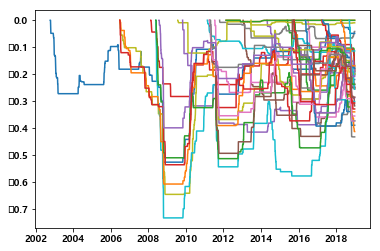

In [11]:
#2. 자산군별 데이터 프레임 설정
자료 = {}
for name in 자산군:
    자료[name] = 파일.parse(name)
    자료[name].index = 자료[name]["Date"]
    #날짜 있는 컬럼을 삭제함.
    자료[name].drop('Date', axis = 1, inplace=True)
    #날짜 컬럼을 제외한 컬럼의 갯수
    #print(name+'개수',len(자료[name].columns),"이름은",자료[name].columns)

    # We are going to use a trailing 260 trading day window
    window = 260
    for ETF in 자료[name]:
        # Calculate the max drawdown in the past window days for each day in the series.
        # Use min_periods=1 if you want to let the first 260 days data have an expanding window
        Roll_Max = 자료[name][ETF].rolling(window, min_periods=1).max()
        Roll_Max.rename("Roll_Max", inplace=True)

        Daily_Drawdown = 자료[name][ETF]/Roll_Max - 1.0
        Daily_Drawdown.rename("Daily_Drawdown", inplace=True)

        # Next we calculate the minimum (negative) daily drawdown in that window.
        # Again, use min_periods=1 if you want to allow the expanding window
        Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()
        Max_Daily_Drawdown.rename("Max_Daily_Drawdown", inplace=True)

        ETF = pd.concat([자료[name][ETF],Roll_Max, Daily_Drawdown, Max_Daily_Drawdown], axis=1)
        plt.plot(Max_Daily_Drawdown, label=ETF)